In [1]:
'''
Example implementations of HARK.ConsumptionSaving.ConsPortfolioModel
'''
from HARK.ConsumptionSaving.ConsPortfolioModel import PortfolioConsumerType, init_portfolio
from HARK.ConsumptionSaving.ConsIndShockModel import init_lifecycle
from HARK.utilities import plotFuncs
from copy import copy
from time import time
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Make and solve an example portfolio choice consumer type
print('Now solving an example portfolio choice problem; this might take a moment...')
MyType = PortfolioConsumerType()
MyType.cycles = 0
t0 = time()
MyType.solve()
t1 = time()
MyType.cFunc = [MyType.solution[t].cFuncAdj for t in range(MyType.T_cycle)]
MyType.ShareFunc = [MyType.solution[t].ShareFuncAdj for t in range(MyType.T_cycle)]
print('Solving an infinite horizon portfolio choice problem took ' + str(t1-t0) + ' seconds.')

Now solving an example portfolio choice problem; this might take a moment...
Solving an infinite horizon portfolio choice problem took 18.253526210784912 seconds.


In [3]:
# Compute the Merton-Samuelson limiting portfolio share when returns are lognormal
MyType.RiskyVar = MyType.RiskyStd**2
MyType.RiskPrem = MyType.RiskyAvg - MyType.Rfree
def RiskyShareMertSamLogNormal(RiskPrem,CRRA,RiskyVar):
    return RiskPrem/(CRRA*RiskyVar)

Consumption function over market resources:


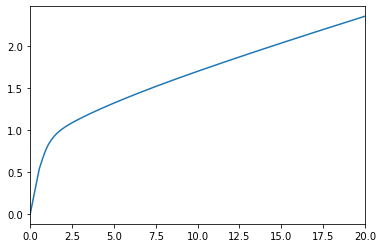

Risky asset share as a function of market resources:
Optimal (blue) versus Theoretical Limit (orange)


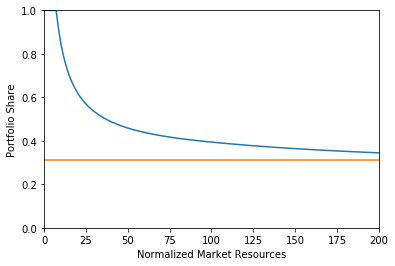

In [4]:
# Plot the consumption and risky-share functions
print('Consumption function over market resources:')
plotFuncs(MyType.cFunc[0], 0., 20.)
print('Risky asset share as a function of market resources:')
print('Optimal (blue) versus Theoretical Limit (orange)')
plt.xlabel('Normalized Market Resources')
plt.ylabel('Portfolio Share')
plt.ylim(0.0,1.0)
# Since we are using a discretization of the lognormal distribution,
# the limit is numerically computed and slightly different from 
# the analytical limit obtained by Merton and Samuelson for infinite wealth
plotFuncs([MyType.ShareFunc[0]
#           ,lambda m: RiskyShareMertSamLogNormal(MyType.RiskPrem,MyType.CRRA,MyType.RiskyVar)*np.ones_like(m)
           ,lambda m: MyType.ShareLimit*np.ones_like(m)
          ] , 0., 200.)

In [5]:
# Now simulate this consumer type
MyType.track_vars = ['cNrmNow', 'ShareNow', 'aNrmNow', 't_age']
MyType.T_sim = 100
MyType.initializeSim()
MyType.simulate()

In [6]:
print('\n\n\n')
print('For derivation of the numerical limiting portfolio share')
print('as market resources approach infinity, see')
print('http://www.econ2.jhu.edu/people/ccarroll/public/lecturenotes/AssetPricing/Portfolio-CRRA/')





For derivation of the numerical limiting portfolio share
as market resources approach infinity, see
http://www.econ2.jhu.edu/people/ccarroll/public/lecturenotes/AssetPricing/Portfolio-CRRA/


In [7]:
""
# Make another example type, but this one optimizes risky portfolio share only
# on the discrete grid of values implicitly chosen by RiskyCount, using explicit
# value maximization.
init_discrete_share = init_portfolio.copy()
init_discrete_share['DiscreteShareBool'] = True
init_discrete_share['vFuncBool'] = True # Have to actually construct value function for this to work

In [8]:
# Make and solve a discrete portfolio choice consumer type
print('Now solving a discrete choice portfolio problem; this might take a minute...')
DiscreteType = PortfolioConsumerType(**init_discrete_share)
DiscreteType.cycles = 0
t0 = time()
DiscreteType.solve()
t1 = time()
DiscreteType.cFunc = [DiscreteType.solution[t].cFuncAdj for t in range(DiscreteType.T_cycle)]
DiscreteType.ShareFunc = [DiscreteType.solution[t].ShareFuncAdj for t in range(DiscreteType.T_cycle)]
print('Solving an infinite horizon discrete portfolio choice problem took ' + str(t1-t0) + ' seconds.')

Now solving a discrete choice portfolio problem; this might take a minute...
Solving an infinite horizon discrete portfolio choice problem took 35.31377863883972 seconds.


Consumption function over market resources:


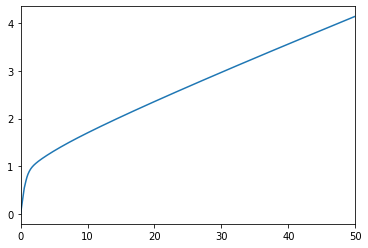

Risky asset share as a function of market resources:
Optimal (blue) versus Theoretical Limit (orange)


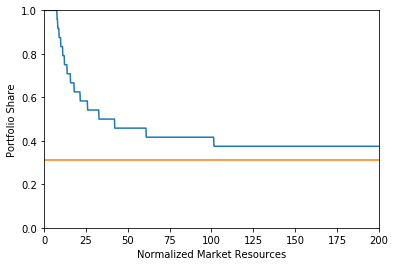

In [9]:
# Plot the consumption and risky-share functions
print('Consumption function over market resources:')
plotFuncs(DiscreteType.cFunc[0], 0., 50.)
print('Risky asset share as a function of market resources:')
print('Optimal (blue) versus Theoretical Limit (orange)')
plt.xlabel('Normalized Market Resources')
plt.ylabel('Portfolio Share')
plt.ylim(0.0,1.0)
# Since we are using a discretization of the lognormal distribution,
# the limit is numerically computed and slightly different from 
# the analytical limit obtained by Merton and Samuelson for infinite wealth
plotFuncs([DiscreteType.ShareFunc[0]
           ,lambda m: DiscreteType.ShareLimit*np.ones_like(m)
          ] , 0., 200.)

In [10]:
print('\n\n\n')

In [11]:
""
# Make another example type, but this one can only update their risky portfolio
# share in any particular period with 15% probability.
init_sticky_share = init_portfolio.copy()
init_sticky_share['AdjustPrb'] = 0.15

In [12]:
# Make and solve a discrete portfolio choice consumer type
print('Now solving a portfolio choice problem with "sticky" portfolio shares; this might take a moment...')
StickyType = PortfolioConsumerType(**init_sticky_share)
StickyType.cycles = 0
t0 = time()
StickyType.solve()
t1 = time()
StickyType.cFuncAdj = [StickyType.solution[t].cFuncAdj for t in range(StickyType.T_cycle)]
StickyType.cFuncFxd = [StickyType.solution[t].cFuncFxd for t in range(StickyType.T_cycle)]
StickyType.ShareFunc = [StickyType.solution[t].ShareFuncAdj for t in range(StickyType.T_cycle)]
print('Solving an infinite horizon sticky portfolio choice problem took ' + str(t1-t0) + ' seconds.')

Now solving a portfolio choice problem with "sticky" portfolio shares; this might take a moment...
Solving an infinite horizon sticky portfolio choice problem took 39.40346646308899 seconds.


Consumption function over market resources when the agent can adjust his portfolio:


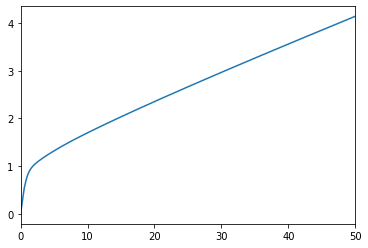

In [13]:
# Plot the consumption and risky-share functions
print('Consumption function over market resources when the agent can adjust his portfolio:')
plotFuncs(StickyType.cFuncAdj[0], 0., 50.)

Consumption function over market resources when the agent CAN'T adjust, by current share:


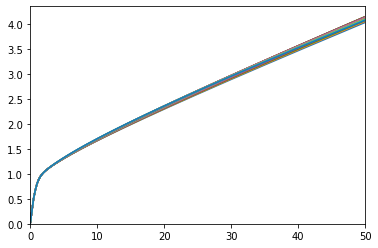

In [14]:
print("Consumption function over market resources when the agent CAN'T adjust, by current share:")
M = np.linspace(0., 50., 200)
for s in np.linspace(0.,1.,21):
    C = StickyType.cFuncFxd[0](M, s*np.ones_like(M))
    plt.plot(M,C)
plt.xlim(0.,50.)
plt.ylim(0.,None)
plt.show()

Risky asset share function over market resources (when possible to adjust):
Optimal (blue) versus Theoretical Limit (orange)


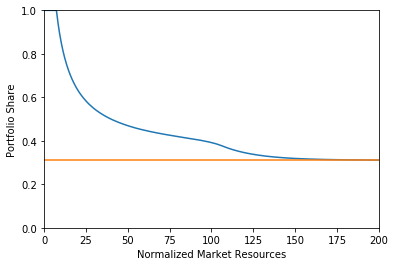

In [15]:
print('Risky asset share function over market resources (when possible to adjust):')
print('Optimal (blue) versus Theoretical Limit (orange)')
plt.xlabel('Normalized Market Resources')
plt.ylabel('Portfolio Share')
plt.ylim(0.0,1.0)
plotFuncs([StickyType.ShareFunc[0]
           ,lambda m: StickyType.ShareLimit*np.ones_like(m)
          ] , 0., 200.)

In [16]:
""
# Make another example type, but this one has *age-varying* perceptions of risky asset returns.
# Begin by making a lifecycle dictionary, but adjusted for the portfolio choice model.
init_age_varying_risk_perceptions = copy(init_lifecycle)
init_age_varying_risk_perceptions['RiskyCount']      = init_portfolio['RiskyCount']
init_age_varying_risk_perceptions['ShareCount']      = init_portfolio['ShareCount']
init_age_varying_risk_perceptions['aXtraMax']        = init_portfolio['aXtraMax']
init_age_varying_risk_perceptions['aXtraCount']      = init_portfolio['aXtraCount']
init_age_varying_risk_perceptions['aXtraNestFac']    = init_portfolio['aXtraNestFac']
init_age_varying_risk_perceptions['BoroCnstArt']     = init_portfolio['BoroCnstArt']
init_age_varying_risk_perceptions['CRRA']            = init_portfolio['CRRA']
init_age_varying_risk_perceptions['DiscFac']         = init_portfolio['DiscFac']

In [17]:
init_age_varying_risk_perceptions['RiskyAvg']        = 10*[1.08]
init_age_varying_risk_perceptions['RiskyStd']        = [0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29]
init_age_varying_risk_perceptions['RiskyAvgTrue']    = 1.08
init_age_varying_risk_perceptions['RiskyStdTrue']    = 0.20
AgeVaryingRiskPercType = PortfolioConsumerType(**init_age_varying_risk_perceptions)
AgeVaryingRiskPercType.cycles = 1

In [18]:
# Solve the agent type with age-varying risk perceptions
print('Now solving a portfolio choice problem with age-varying risk perceptions...')
t0 = time()
AgeVaryingRiskPercType.solve()
AgeVaryingRiskPercType.cFunc = [AgeVaryingRiskPercType.solution[t].cFuncAdj for t in range(AgeVaryingRiskPercType.T_cycle)]
AgeVaryingRiskPercType.ShareFunc = [AgeVaryingRiskPercType.solution[t].ShareFuncAdj for t in range(AgeVaryingRiskPercType.T_cycle)]
t1 = time()
print('Solving a ' + str(AgeVaryingRiskPercType.T_cycle) + ' period portfolio choice problem with age-varying risk perceptions took ' + str(t1-t0) + ' seconds.')

Now solving a portfolio choice problem with age-varying risk perceptions...
Solving a 10 period portfolio choice problem with age-varying risk perceptions took 0.8187141418457031 seconds.


Consumption function over market resources in each lifecycle period:


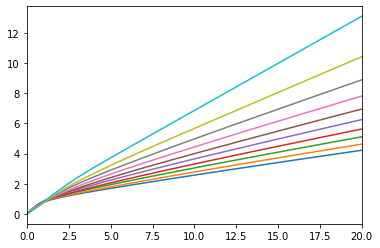

Risky asset share function over market resources in each lifecycle period:


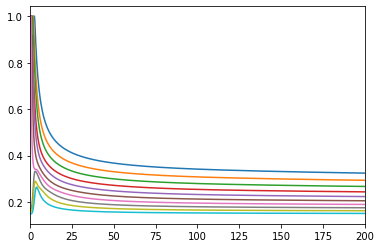

In [19]:
# Plot the consumption and risky-share functions
print('Consumption function over market resources in each lifecycle period:')
plotFuncs(AgeVaryingRiskPercType.cFunc, 0., 20.)
print('Risky asset share function over market resources in each lifecycle period:')
plotFuncs(AgeVaryingRiskPercType.ShareFunc, 0., 200.)